# Indicators of Heavy Traffic on I-94 Interstate Highway

In this Project im going to be analysing a dataset about the westbound traffic on the **Interstate 94 highway (I-94)**. The highway connects the Great Lakes and northern Great Plains regions of the United States. More information about the highway can be found [here.](https://en.wikipedia.org/wiki/Interstate_94)<br />
The Dataset i will be working with was made available by John Hogue, and it can be downloaded from the [UCI Machine Learning Repository.](https://archive-beta.ics.uci.edu/dataset/492/metro+interstate+traffic+volume)

**The aim:** <br /> 
The goal of this analysis is to help determine a few indicators of heavy traffic on the I-94 Highway. These indicators can be weather type, time of the day, time of the year, etc. 

In [1]:
# Importing the required Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the csv file
dataset = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

# Data Exploration 

I start the exploration by examining the first and the last five rows of the dataframe

In [3]:
dataset.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
dataset.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


I'm now using the  `info()` method to find more information about the dataset.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [6]:
# Column names
dataset.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

**Here is a table with the column names and their interpretation**



| Column name         | Interpretation                                                                |
|---------------------|-------------------------------------------------------------------------------|
| "holiday"           | Categorical US National holidays plus regional holiday, Minnesota State Fair. |
| "temp"              | Numeric Average temp in kelvin.                                               |
| "rain_1h"             | Numeric Amount in mm of rain that occurred in the hour.                       |
| "snow_1h"             | Numeric Amount in mm of snow that occurred in the hour.                       |
| "clouds_all"          | Numeric Percentage of cloud cover.                                            |
| "weather_main"        | Categorical Short textual description of the current weather.                 |
| "weather_description" | Categorical Longer textual description of the current weather.                |
| "date_time"           | DateTime Hour of the data collected in local CST time.                        |
| "traffic_volume"      | Numeric Hourly I-94 ATR 301 reported westbound traffic volume.                |

In [7]:
dataset["date_time"].value_counts().sort_index()

2012-10-02 09:00:00    1
2012-10-02 10:00:00    1
2012-10-02 11:00:00    1
2012-10-02 12:00:00    1
2012-10-02 13:00:00    1
                      ..
2018-09-30 19:00:00    1
2018-09-30 20:00:00    1
2018-09-30 21:00:00    1
2018-09-30 22:00:00    1
2018-09-30 23:00:00    1
Name: date_time, Length: 40575, dtype: int64

**From the Exploration**
   - The dataset has 48,204 rows and 9 columns, and there are no null values.
   - Each row describes traffic and weather data for a specific hour. 
   - We have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00, recorded in the *(Yyyy-Mm-Dd hh:mm:ss)* format<br />
   
**The [dataset documentation](https://archive-beta.ics.uci.edu/dataset/492/metro+interstate+traffic+volume) also stated that:**
- The data was collected from a station located approximately midway between Minneapolis and Saint Paul.
- The direction of the route is westbound (i.e., cars moving from east to west). <br />

This means that the results of the analysis will be about the westbound traffic in the proximity of the station, and the result is not to be generalized for the entire I-94 highway.

# Analyzing Traffic Volume

Im going to start the analysis by examining the distribution of the `traffic_volume` column, I would be plotting a histogram to visualize the distribution of the column.

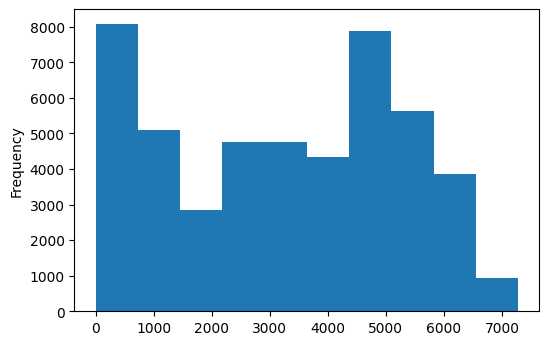

In [8]:
# Plotting a histogram to visualize the distribution
dataset["traffic_volume"].plot.hist()
plt.show()


In [9]:
# Using Panda's descrribe method to get more details about the distribution
dataset["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From the information above:
Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour  However, about 75% of the time, the traffic volume was four times as much (4,933 cars or more).

There is an spiked increase and decrease in the traffic volume which is probably a result of the period of the day at which the traffic volume was recorded. 

To verify my hypothesis i would be comparing daytime data with nighttime data.
That is; Day vs Night Traffic Volume. 

# Traffic Volume: Day vs. Night

I'll start by dividing the dataset into two parts:
- Daytime data: hours from 7 AM to 7 PM (15 hours).
- Nighttime data: hours from 7 PM to 7 AM (9 hours).<br />
This may not be a perfect criterion for distinguishing between nighttime and daytime, but it's a good starting point.

In [10]:
# Transform the date_time column to a datetime object
dataset["date_time"] = pd.to_datetime(dataset["date_time"])

In [11]:
# Extract rows with hours from 7AM to 7PM
day = dataset.copy()[(dataset['date_time'].dt.hour >= 7) & (dataset['date_time'].dt.hour < 19)]
print(day.shape)

(23877, 9)


In [12]:
# Extract rows with hours from 7PM to 7AM
night = dataset.copy()[(dataset['date_time'].dt.hour >= 19) | (dataset['date_time'].dt.hour <7)]
print(night.shape)

(24327, 9)


I have isolated the Daytime Data and the Nighttime Data into `day` and `night` respectively. I'm now  going to look at their histograms of traffic volume side-by-side for comparison. 

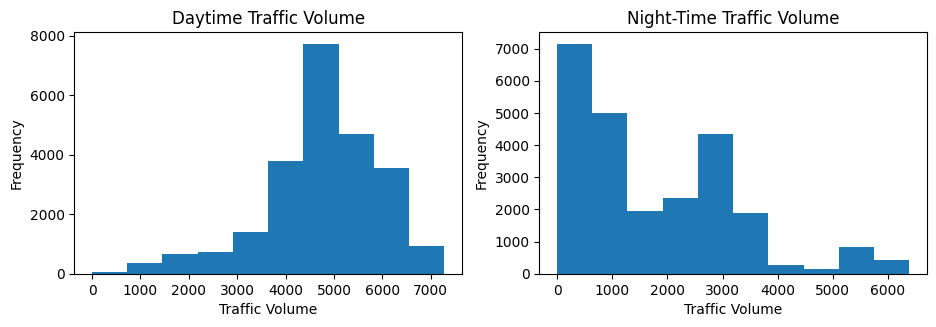

In [13]:
plt.figure(figsize=(11,3.2))

# Datytime Histogram Plot
plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.title('Daytime Traffic Volume')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

# Night-Time Histogram Plot
plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.title('Night-Time Traffic Volume')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

- The histogram that shows the distribution of traffic volume during the day is left skewed, which means that most of the traffic volume values are high.
- The histogram displaying the distribution of traffic volume of the nighttime data is right skewed, which means that most of the traffic volume values are low.

For more statistical details I'm going to use Pandas describe() method on the `traffic_volume` column on both dataset

In [14]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [15]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The Output above shows that for the Daytime dataset there are 4,252 or more cars passing the station each hour 75% of the time, and the number of cars that passed the station each hour 75% of the time was less than 2,819 for the Night-Time dataset. <br/>
Which points out that the traffic at night is generally lighter compared to the traffic during the day. 

The objective of the analysis is to find indicators of heavy traffic, so I'll only focus on the daytime data moving forward.

# Traffic Volume Indicators
## Time Indicators: 
One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of day.

Im gong to visualize a few plots showing how the traffic volume changes according to:

- The Month of the Year
- Day of the Week
- Hour of the Day


### Traffic volume changes by month

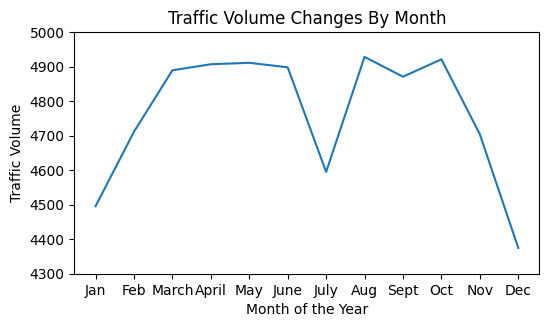

In [16]:
day['month'] = day.loc[:,"date_time"].dt.month
month = day.groupby('month').mean()
plt.figure(figsize=(6,3.2))
plt.plot(month.index,month["traffic_volume"])
plt.ylim(4300,5000)
labels = ["Jan","Feb","March","April","May","June",
          "July","Aug","Sept","Oct","Nov","Dec"]
plt.xticks(month.index,labels)
plt.xlabel("Month of the Year")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume Changes By Month")
plt.show()

From the Visualization above the traffic looks less heavy during wintry months,i.e (November–February), and more heightened during warm months (March–October), but with an exception in the month of July. <br/> 

To investigate if traffic is significantly less heavy in July each year I'll plot a line graph to show how the traffic volume changed each year in July.

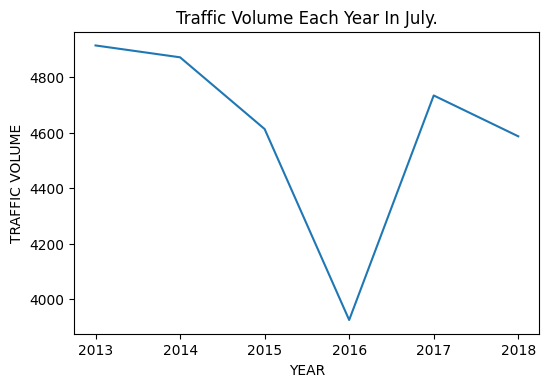

In [17]:
day['year'] = day['date_time'].dt.year
july = day[day['month'] == 7]
july_year = july.groupby('year').mean()
plt.plot(july_year.index,july_year['traffic_volume'])
plt.title("Traffic Volume Each Year In July.")
plt.xlabel("YEAR")
plt.ylabel("TRAFFIC VOLUME")
plt.show()

Most often, the traffic is pretty heavy in July, similar to the other warm months. The only exclusion is in the year 2016, which had a high reduction in traffic volume.
So, July is still considered as a month with high traffic volume.

At this point it is considerate enough to say that warm months generally have heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

### Traffic volume changes for each day of the week

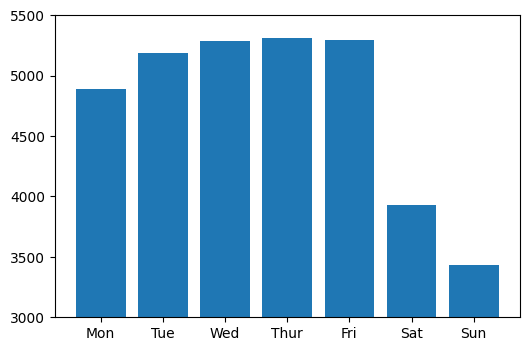

In [18]:
day['day_of_week']= day['date_time'].dt.dayofweek
by_day_of_week = day.groupby('day_of_week').mean()
plt.bar(by_day_of_week.index,by_day_of_week['traffic_volume'])
labels = ["Mon","Tue","Wed","Thur","Fri","Sat",
          "Sun"]
plt.xticks(by_day_of_week.index,labels)
plt.ylim(3000,5500)
plt.show()

Traffic volume is significantly heavier on business days (Monday – Friday),the traffic volume is over 4,700 during business days. On the other hand traffic is lighter on weekends (Saturday and Sunday), with taffic volume below 4,000 cars.

### Traffic Volume Changes for each hour of  the day

Since traffic is lighter on weekends and heavier during working days, i would split the dataset into two, based on the day type: business day or weekend. So that the value of the weekend traffic volumes will not drag down the averages. 

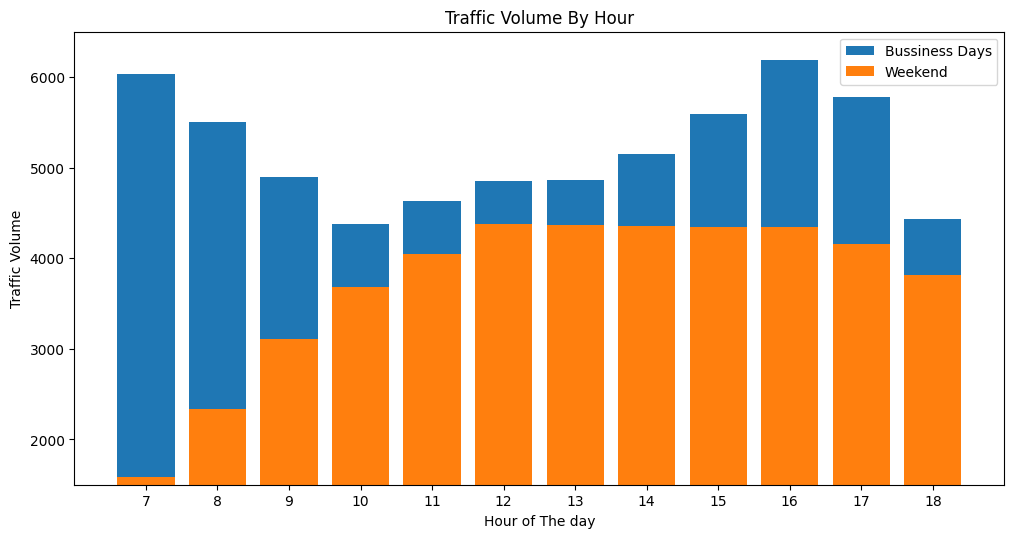

In [19]:
# spliting the dataset into two(Bussiness day & Weekends)
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['day_of_week'] <= 4] 
weekend = day.copy()[day['day_of_week'] >= 5] 
by_bussiness_hour = bussiness_days.groupby('hour').mean()
by_weekend_hour = weekend.groupby('hour').mean()


plt.figure(figsize=(12,6))
#Buisness day Plot
#plt.subplot(1, 2, 1)
plt.bar(by_bussiness_hour.index,by_bussiness_hour['traffic_volume'],
        label="Bussiness Days")
# Weekend plot
#plt.subplot(1, 2, 1)
plt.bar(by_weekend_hour.index,by_weekend_hour['traffic_volume'],
        label="Weekend")

plt.xlim(6,19)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour')
plt.xlabel("Hour of The day")
plt.ylabel("Traffic Volume")
labels = ["7","8","9","10","11","12","13",
          "14","15","16","17","18"]
plt.xticks(by_weekend_hour.index,labels)
plt.legend()

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. Also the rush hours are around 7 and 16 (7am and 4pm) during bussiness days — when most people travel from home to work and back from work, during these rush hours, traffic volumes go over 6000 cars.

### In summary, here are a few time-related indicators of heavy traffic:
- The traffic is usually **heavier during warm months (March–October)** compared to cold months (November–February).
- The traffic is usually **heavier on business days** compared to weekends.
- On business days, the **rush hours are around 7 and 16** (7am and 4pm).

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.<br>
 I'll start by looking up their correlation values with traffic_volume.

In [20]:
day.loc[:,["temp","rain_1h","snow_1h","clouds_all",
           "traffic_volume"]].corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of +0.13. The other relevant columns (`rain_1h`, `snow_1h`, `clouds_all`) don't show any strong correlation with traffic_value.<br>
I'll now generate a scatter plot to visualize the correlation between `temp` and `traffic_volume`.

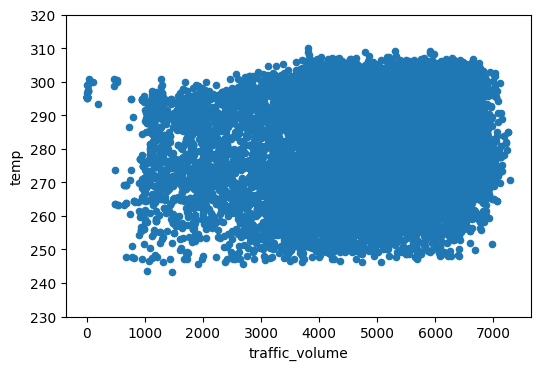

In [21]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) 
plt.show()

With the Visulization above we can conclude that temperature doesn't look like a solid indicator of heavy traffic.

Let's now look at the other weather-related columns: `weather_main` and `weather_description`.

To start, I'll group the data by `weather_main` and look at the traffic_volume averages.


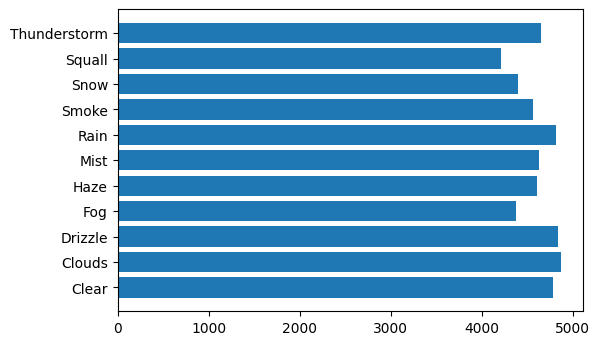

In [22]:
by_weather_main = day.groupby('weather_main').mean()
plt.barh(by_weather_main.index,by_weather_main['traffic_volume'])
plt.show()

There's no weather type where traffic volume exceeds 5,000 cars in the chart above, finding a heavy traffic indicator from it may be difficult.<br>
Now let's look at the second column `weather_description`, which has a more granular weather classification maybe we'll find an indicator.

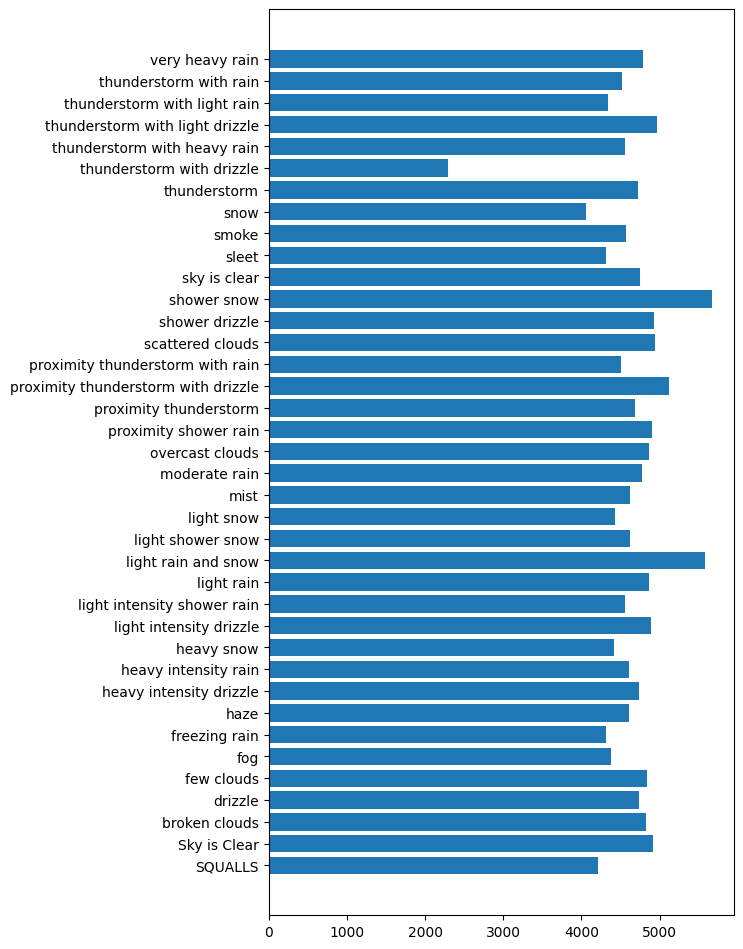

In [23]:
by_weather_desc = day.groupby('weather_description').mean()
plt.figure(figsize=(6,12))
plt.barh(by_weather_desc.index,by_weather_desc['traffic_volume'])
plt.show()

However for this column(`weather_description`), it looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle <br>
It's not clear why these weather types have the highest average traffic values — it is bad weather, but not that bad..

# Conclusion

In this poject I tried to find a few indicators of heavy traffic on the I-94 Interstate highway. I managed to find two types of indicators:

**Time indicators**
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 7 and 16.<br /> 

**Weather indicators**
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle